# ASSIGNMENT 2 : Team 8

## `Assumptions`

* Based in the _USA_ according to all the given county, state and city names. Assuming it's the ONLY country's data

* __VIN__ stands for __Vehicle Identification Number__ and its purpose is to uniquely identify each vehicle in the country (just like a Number Plate). _DOL Vehicle ID_ stands for Department of Licensing Vehicle ID and again, seems that the purpose of it is also to uniquely ID each vehicle in the country

* Although, on checking, VIN is not unique for all the rows while DOL is unique for all rows. Thus, dropping DOLVID as there is no usecase for it since unique for all rows

## `All Imports`

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, pointbiserialr, f_oneway

## `Loading & Pre-processing Dataset`

In [4]:
MAIN_DATA = pd.read_csv("Electric_Vehicle_Data.csv")

# Total Rows & Rows with NaN (even single one of it)
print("Total rows:", len(MAIN_DATA))
print("Rows with NaN:", len(MAIN_DATA[MAIN_DATA.isnull().any(axis=1)]))
print(
    "\nThus, simply dropping all the rows with even a single NaN value as its almost a negligible number compared to total rows!"
)

# Dropping rows with NaN (even single one of it amongst the columns)
MAIN_DATA = MAIN_DATA.dropna()

# Printing all the total rows now
print("\nTotal rows Now:", len(MAIN_DATA))

# Total unique DOL Vehicle ID
print("Total unique DOL Vehicle ID:", len(MAIN_DATA["DOL Vehicle ID"].unique()))

# Dropping DOLVID column
print(
    "Dropping DOL Vehicle ID column as its unique for all rows (no generalisation possible)!"
)

# Dropping DOLVID as its of no use (unique for all so cant generalise)
MAIN_DATA.drop(columns=["DOL Vehicle ID"], inplace=True)

Total rows: 181458
Rows with NaN: 403

Thus, simply dropping all the rows with even a single NaN value as its almost a negligible number compared to total rows!

Total rows Now: 181055
Total unique DOL Vehicle ID: 181055
Dropping DOL Vehicle ID column as its unique for all rows (no generalisation possible)!


## `Unique Values (for all columns)`

In [5]:
# Renaming the VIN column
MAIN_DATA.rename(columns={"VIN (1-10)": "VIN"}, inplace=True)

# Total unique values for each of the column
print("\nTotal unique values for each of the column:")
for col in MAIN_DATA.columns:
    print(col, ":", len(MAIN_DATA[col].unique()))


Total unique values for each of the column:
VIN : 11055
County : 39
City : 468
State : 1
Postal Code : 542
Model Year : 22
Make : 40
Model : 143
Electric Vehicle Type : 2
Clean Alternative Fuel Vehicle (CAFV) Eligibility : 3
Electric Range : 103
Base MSRP : 31
Legislative District : 49
Vehicle Location : 542
Electric Utility : 75
2020 Census Tract : 1767


## `Dropping columns`

In [6]:
print("\nBelow are the columns that are dropped in the pre-processing part:")

# Removing State as there is ONLY one State unique value
print("-> Removing State as there is ONLY one State unique value!")
MAIN_DATA.drop(columns=["State"], inplace=True)

# Dropping Postal code as its redundant
print("-> Dropping Postal code as its redundant!")
MAIN_DATA.drop(columns=["Postal Code"], inplace=True)

# Dropping Legislative District
print("-> Dropping Legislative District as its not helping in any kind of data generalisation!")
MAIN_DATA.drop(columns=["Legislative District"], inplace=True)

# Dropping Latitude Longitude data as its of no use (redundant)
print("-> Dropping Latitude Longitude data as its of no use (redundant & not generalisable)!")
MAIN_DATA.drop(columns=["Vehicle Location"], inplace=True)


Below are the columns that are dropped in the pre-processing part:
-> Removing State as there is ONLY one State unique value!
-> Dropping Postal code as its redundant!
-> Dropping Legislative District as its not helping in any kind of data generalisation!
-> Dropping Latitude Longitude data as its of no use (redundant & not generalisable)!


## `Co-Relation b/w City, County & State`

In [7]:
print("\nCount of each of the unique cities:")
print(MAIN_DATA["City"].value_counts())

print("\nCount of each of the unique counties:")
print(MAIN_DATA["County"].value_counts())


Count of each of the unique cities:
City
Seattle      30045
Bellevue      9116
Redmond       6568
Vancouver     6329
Bothell       5961
             ...  
Gifford          1
Startup          1
Glenwood         1
Adna             1
Maryhill         1
Name: count, Length: 468, dtype: int64

Count of each of the unique counties:
County
King            94460
Snohomish       21439
Pierce          14043
Clark           10667
Thurston         6600
Kitsap           5956
Spokane          4671
Whatcom          4331
Benton           2183
Skagit           1968
Island           1921
Clallam          1079
Chelan           1078
Yakima           1034
Jefferson         994
San Juan          947
Cowlitz           935
Mason             840
Lewis             767
Grays Harbor      648
Kittitas          643
Grant             585
Franklin          585
Walla Walla       439
Douglas           369
Whitman           341
Klickitat         294
Okanogan          272
Stevens           223
Pacific           204
Skam

### Few Points

* We can notice that the dataset can have a __"new"__ column called Location with the addresses as _City, County, State_

* Now, we already saw that generalising to States would have made no sense as there was only one unique state in the whole dataset. Further, we can generalise the Cities to Counties

* `**ASSUMPTION**` : the above generalisation of cities to their counties has already been given as separate columns. So, without any threshold value, we are directly generalising locations to Counties

* Thus, City column is dropped here and County column is better named as _Location_

In [8]:
# Dropping City column too as already generalised to County
print("-> Dropping City column too as already generalised to County!")
MAIN_DATA.drop(columns=["City"], inplace=True)

# Renaming County column to Location
MAIN_DATA.rename(columns={"County": "Location"}, inplace=True)

# Renaming County column to Location
MAIN_DATA.rename(columns={"Make": "Brand"}, inplace=True)

-> Dropping City column too as already generalised to County!


## `Some Visual Analysis`

In [9]:
cafv_distribution = MAIN_DATA['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
print("CAFV Eligibility Distribution:")
print(cafv_distribution)

CAFV Eligibility Distribution:
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    94566
Clean Alternative Fuel Vehicle Eligible                         66646
Not eligible due to low battery range                           19843
Name: count, dtype: int64


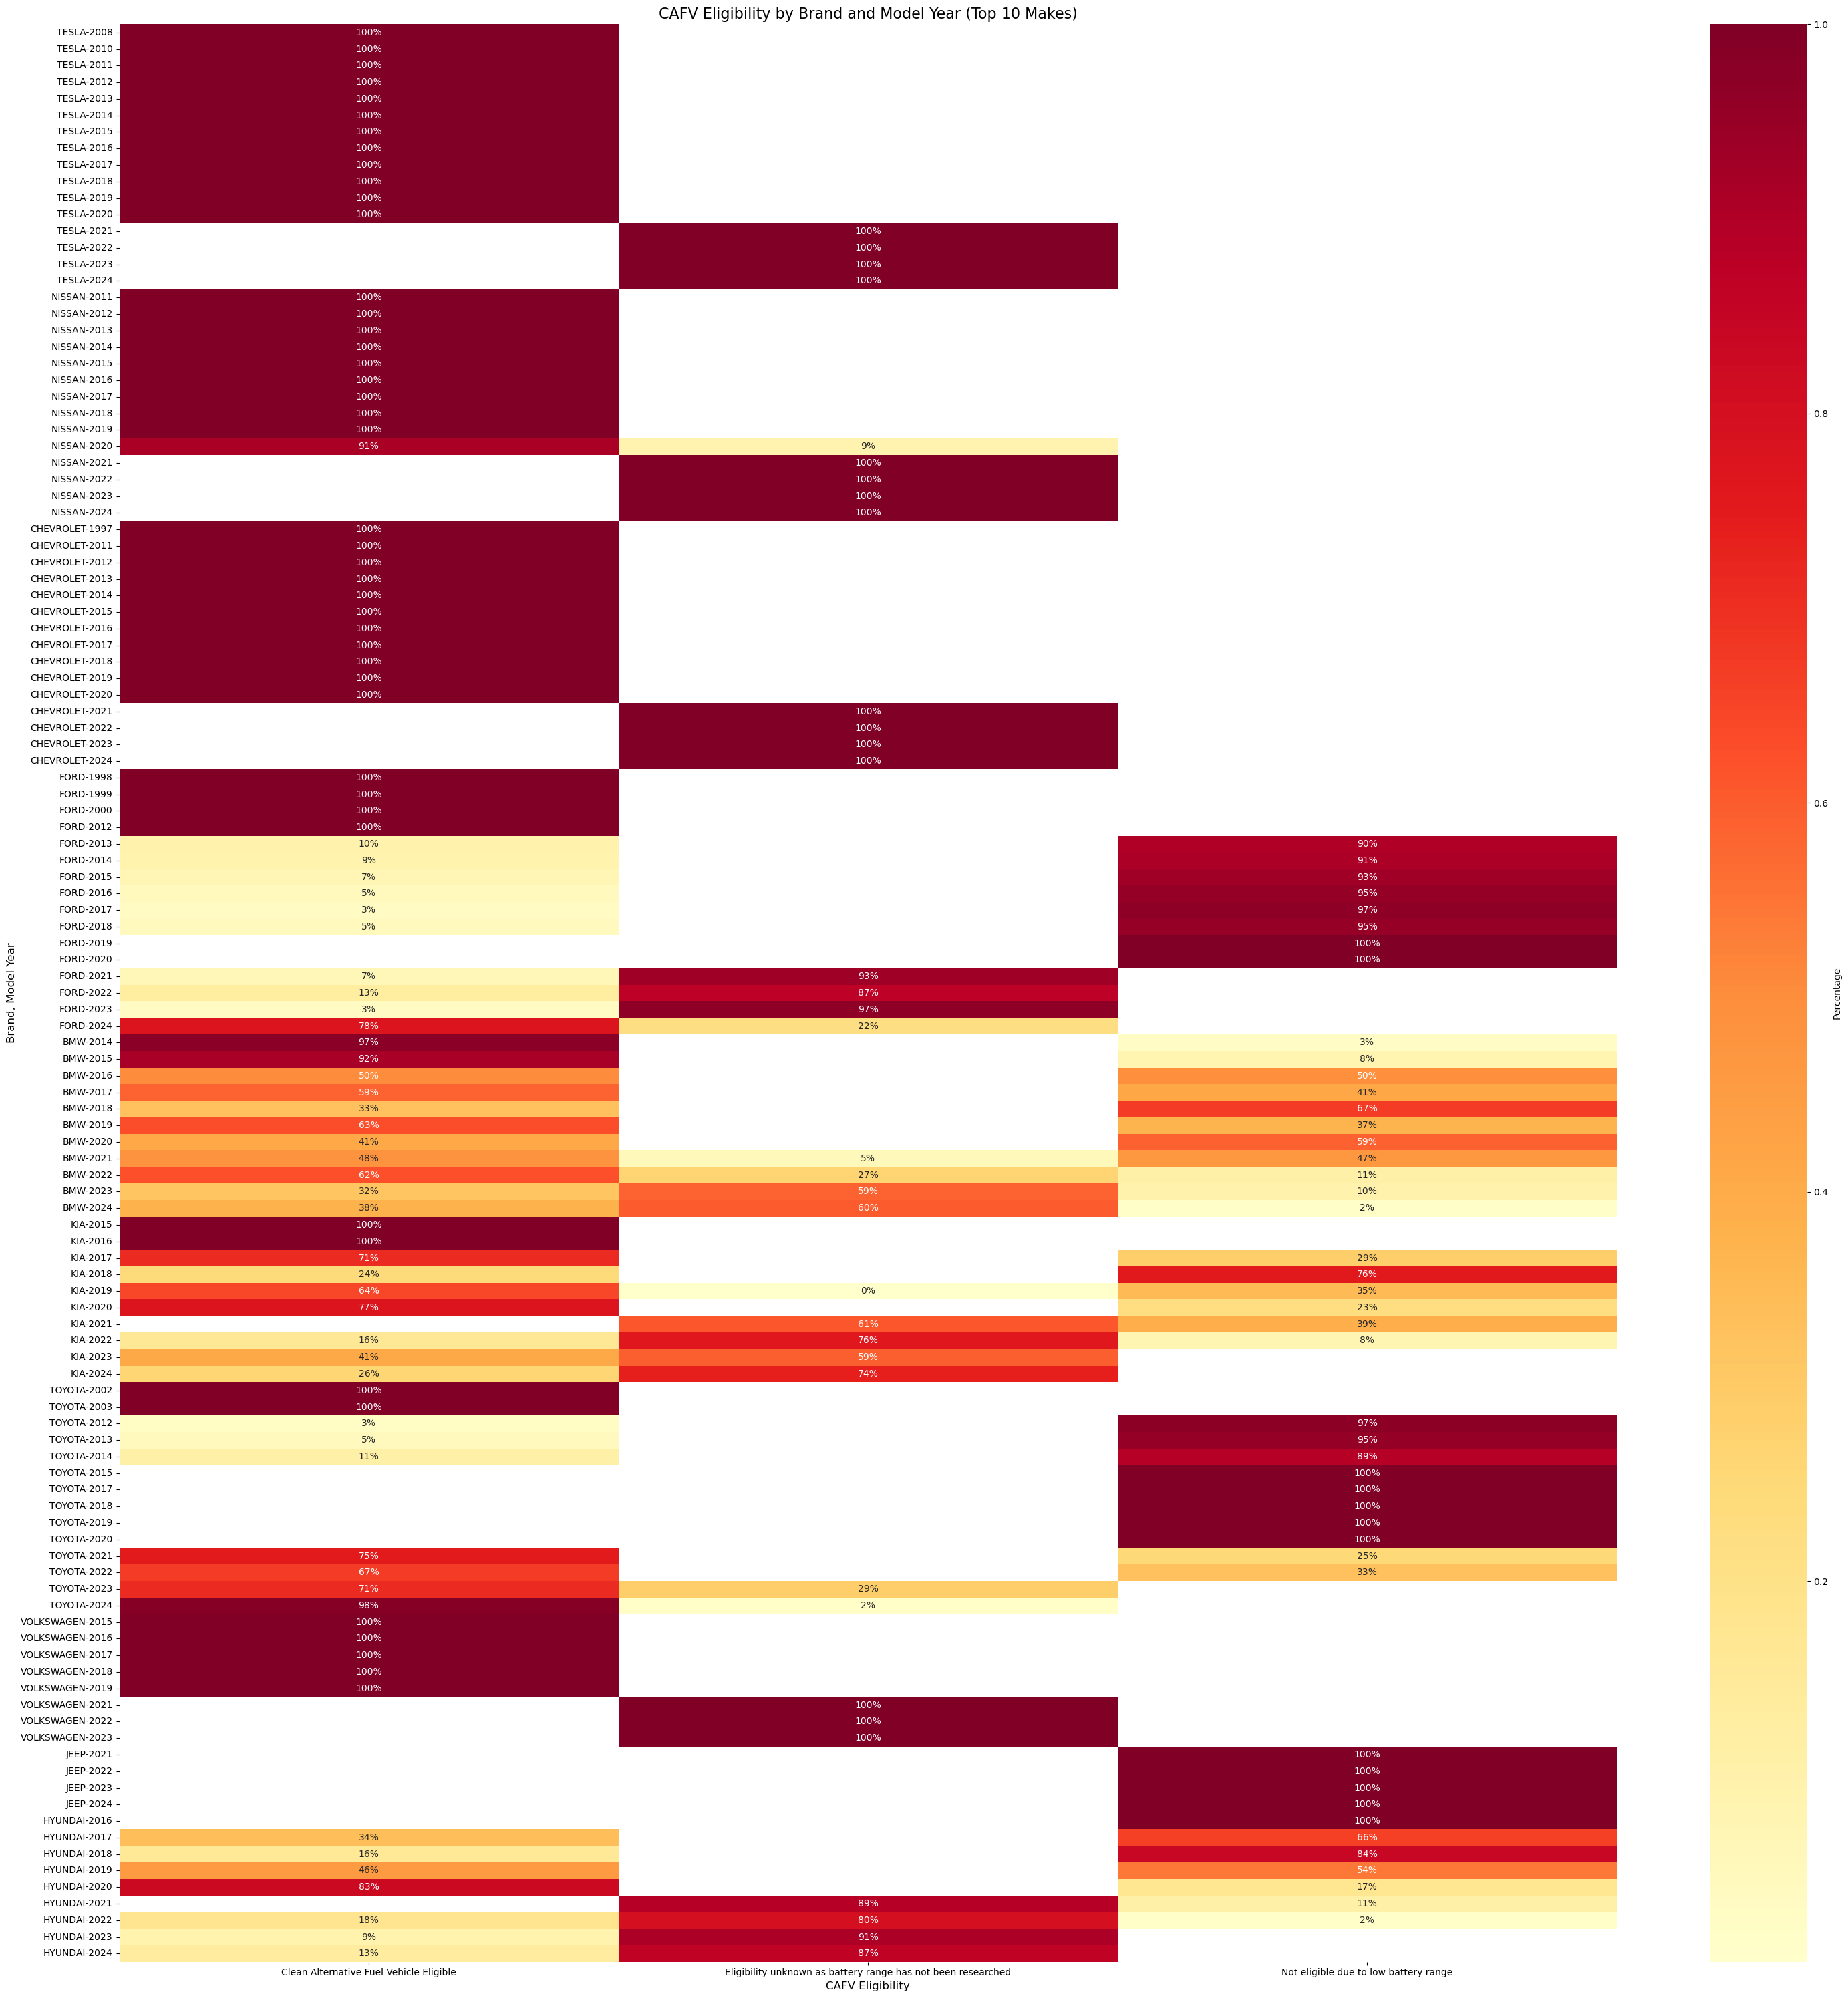

In [10]:
grouped = MAIN_DATA.groupby(['Brand', 'Model Year'])['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(normalize=True).unstack()

# Picking top 15 to find some correlation
top_makes = MAIN_DATA['Brand'].value_counts().nlargest(10).index
grouped_top = grouped.loc[top_makes]

plt.figure(figsize=(30, 30))
sns.heatmap(grouped_top, annot=True, fmt='.0%', cmap='YlOrRd', cbar_kws={'label': 'Percentage'})
plt.title('CAFV Eligibility by Brand and Model Year (Top 10 Makes)', fontsize=16)
plt.xlabel('CAFV Eligibility', fontsize=12)
plt.ylabel('Brand, Model Year', fontsize=12)
plt.tight_layout()
plt.show()

In [11]:
print("\nCount of each of the unique Electric Utilities:")
electric_utility_counts = MAIN_DATA["Electric Utility"].value_counts()

# Print all values without truncation
pd.set_option('display.max_rows', None)
print(electric_utility_counts)

# Reset display options to default (optional)
pd.reset_option('display.max_rows')


Count of each of the unique Electric Utilities:
Electric Utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                                                       67180
PUGET SOUND ENERGY INC                                                                                              36705
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                                                        32012
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                                                    10420
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY                                      7959
PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY                                                                   4090
BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY                                           2846
BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY                      

## `Finding Co-Relation Matrix`

In [19]:
# def cramers_v(x, y):
#     confusion_matrix = pd.crosstab(x, y)
#     chi2 = chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum().sum()
#     phi2 = chi2 / n
#     r, k = confusion_matrix.shape
#     phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
#     rcorr = r - ((r-1)**2)/(n-1)
#     kcorr = k - ((k-1)**2)/(n-1)
#     return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# MAIN_DATA['Model Year'] = pd.to_numeric(MAIN_DATA['Model Year'], errors='coerce')
# MAIN_DATA['Electric Range'] = pd.to_numeric(MAIN_DATA['Electric Range'], errors='coerce')

# numeric_columns = MAIN_DATA.select_dtypes(include=[np.number]).columns
# categorical_columns = MAIN_DATA.select_dtypes(include=['object']).columns

# all_columns = list(MAIN_DATA.columns)
# corr_matrix = pd.DataFrame(index=all_columns, columns=all_columns)

# for col1 in all_columns:
#     for col2 in all_columns:
#         if col1 in numeric_columns and col2 in numeric_columns:
#             corr_matrix.loc[col1, col2] = MAIN_DATA[col1].corr(MAIN_DATA[col2])
#         elif col1 in categorical_columns and col2 in categorical_columns:
#             corr_matrix.loc[col1, col2] = cramers_v(MAIN_DATA[col1], MAIN_DATA[col2])
#         else:
#             if col1 in numeric_columns:
#                 num_col, cat_col = col1, col2
#             else:
#                 num_col, cat_col = col2, col1
#             categories = MAIN_DATA[cat_col].unique()
#             cat_means = MAIN_DATA.groupby(cat_col)[num_col].mean()
#             overall_mean = MAIN_DATA[num_col].mean()
#             between_ss = sum(len(MAIN_DATA[MAIN_DATA[cat_col] == cat]) * (mean - overall_mean)**2 for cat, mean in cat_means.items())
#             total_ss = sum((MAIN_DATA[num_col] - overall_mean)**2)
#             correlation_ratio = np.sqrt(between_ss / total_ss)
#             corr_matrix.loc[col1, col2] = correlation_ratio

# corr_matrix = corr_matrix.astype(float)

# plt.figure(figsize=(20, 16))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
# plt.title('Correlation Matrix of All Variables')
# plt.tight_layout()
# plt.show()

# # We can adjust this threshold
# threshold = 0.8
# potential_redundancies = []

# for i in range(len(corr_matrix.columns)):
#     for j in range(i+1, len(corr_matrix.columns)):
#         if abs(corr_matrix.iloc[i, j]) > threshold:
#             potential_redundancies.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# print("Potential redundancies:")
# for col1, col2, corr in potential_redundancies:
#     print(f"{col1} and {col2}: Correlation = {corr:.2f}")

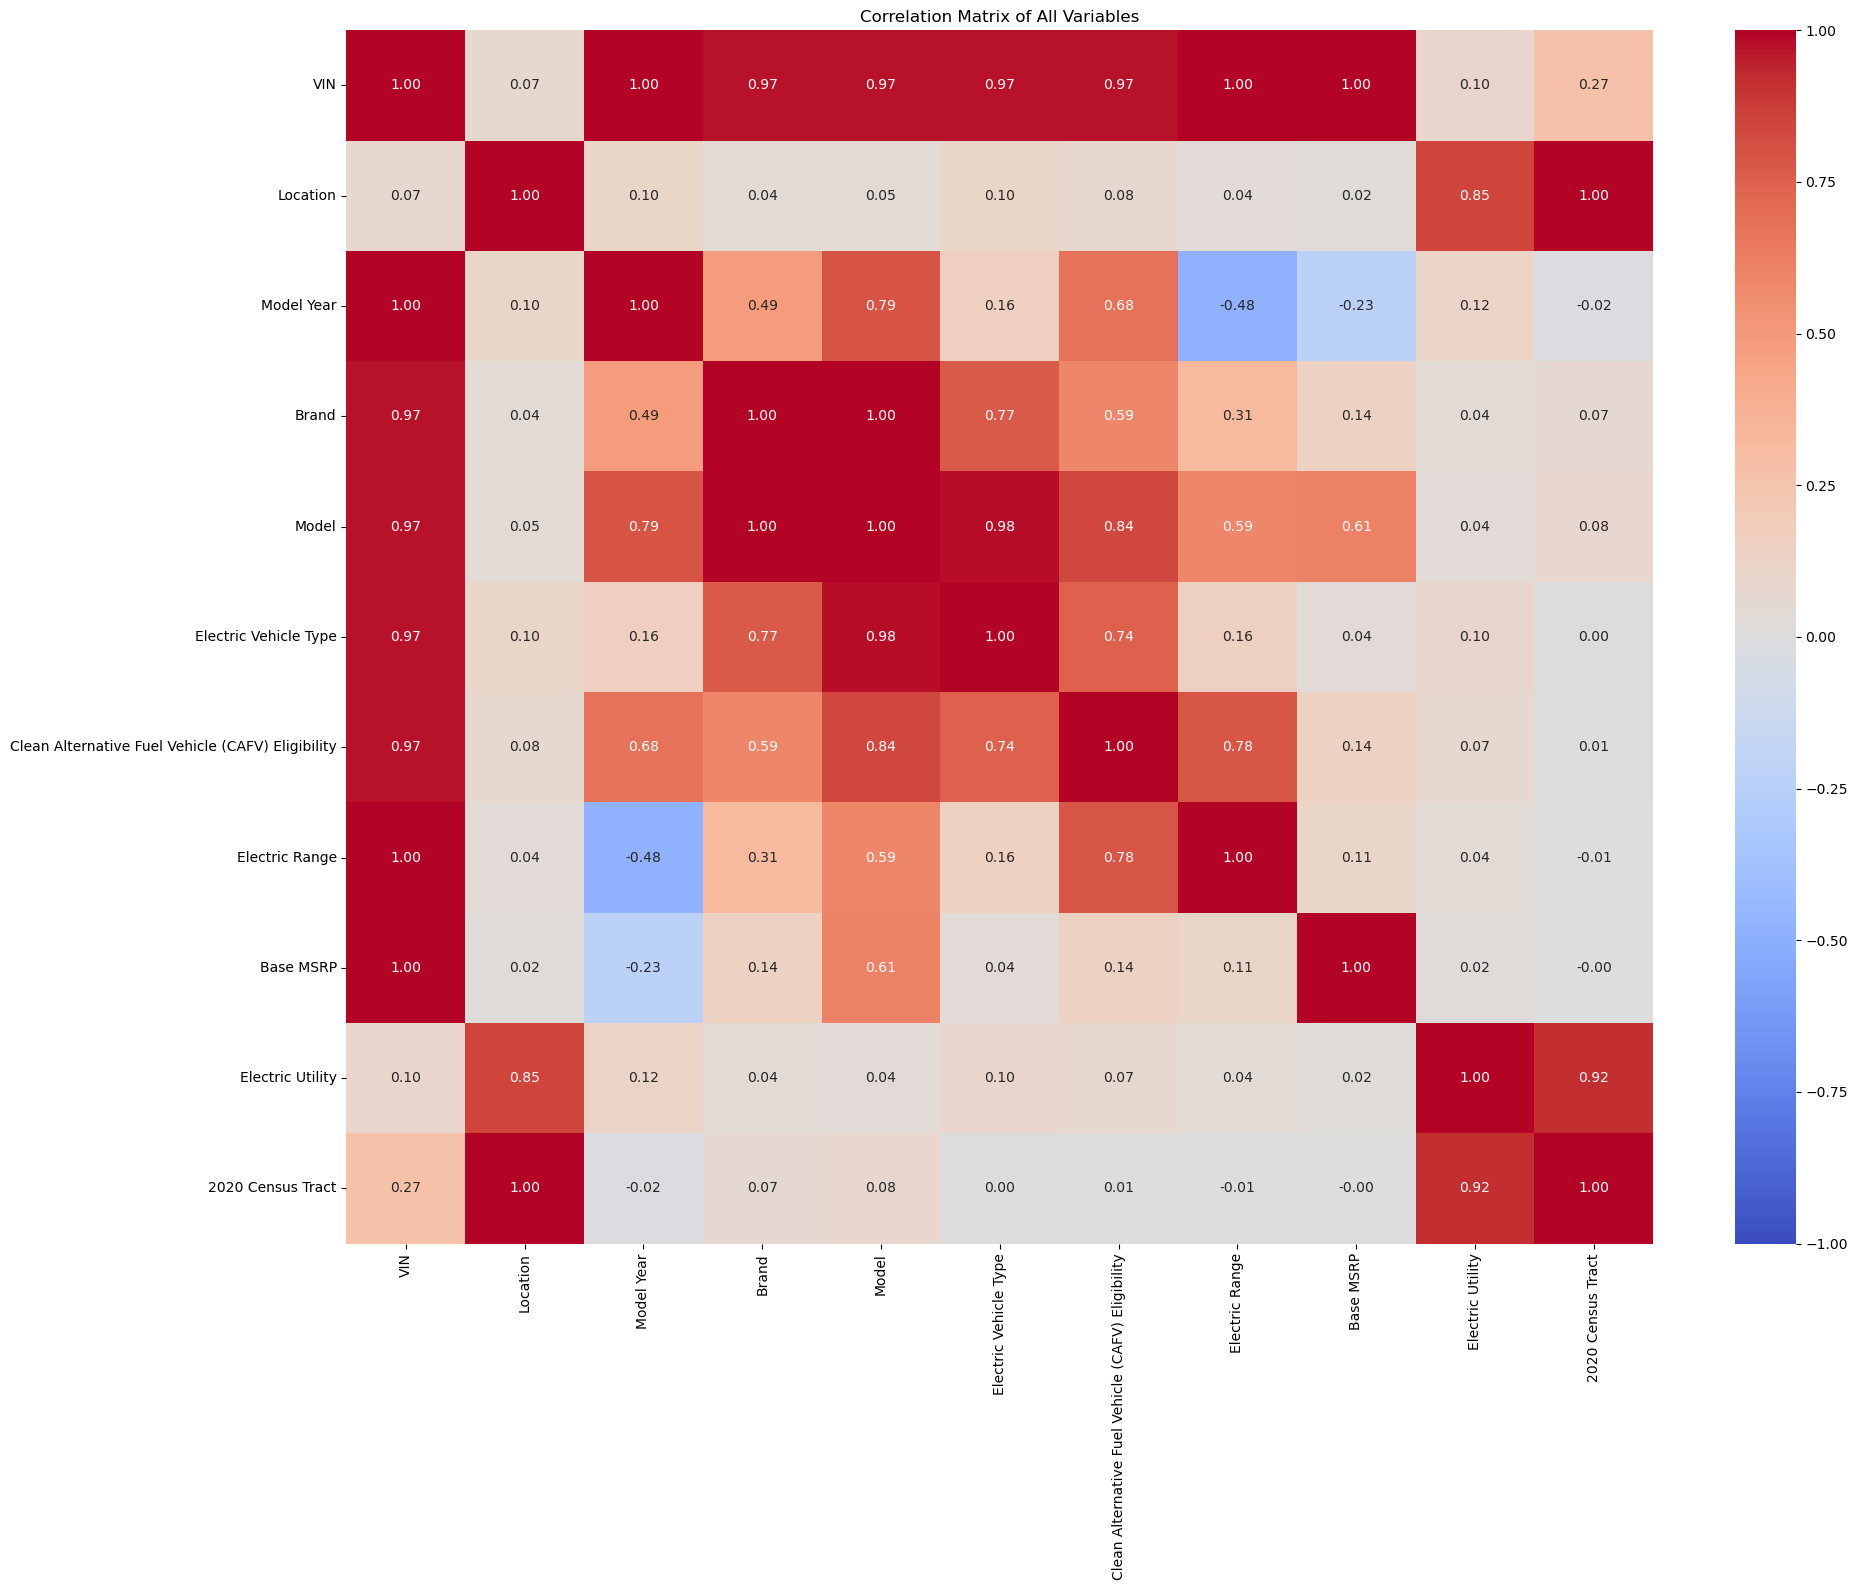

Potential redundancies:

* VIN and Model Year: Correlation = 1.00
* VIN and Brand: Correlation = 0.97
* VIN and Model: Correlation = 0.97
* VIN and Electric Vehicle Type: Correlation = 0.97
* VIN and Clean Alternative Fuel Vehicle (CAFV) Eligibility: Correlation = 0.97
* VIN and Electric Range: Correlation = 1.00
* VIN and Base MSRP: Correlation = 1.00
* Location and Electric Utility: Correlation = 0.85
* Location and 2020 Census Tract: Correlation = 1.00
* Brand and Model: Correlation = 1.00
* Model and Electric Vehicle Type: Correlation = 0.98
* Model and Clean Alternative Fuel Vehicle (CAFV) Eligibility: Correlation = 0.84
* Electric Utility and 2020 Census Tract: Correlation = 0.92

#### Plan of Action - Columns to be generalized for AOI

Columns in order:
* ~~County - 49 unique values, generalize this into zones.~~
* ~~ModelYear - 3 chunks, (1997-2011, 2012-2020, 2021-2024)~~
* ~~Make - 40 brands, possible generalization using brand country~~
* ~~Electric Vehicle type - 2 unique values (keeping this because have 0.98 correlation with Model, hence removing Model column)~~
* ~~CAFV eligibility -  3 unique values~~
* ~~Electric Range - 3 chunks~~
* ~~Electric Utility - 75 unique values but needs generalization based on first keyword before pipe~~

### Inferences:
* As we can see from the correlation matrix, the columns Model and Electric Vehicle type have approximately 1 correlation and thus can be ignored by dropping the Model column. 

In [13]:
# Dropping Latitude Longitude data as its of no use (redundant)
print("-> Dropping Model data as its of no use (redundant & not generalisable)!")
MAIN_DATA.drop(columns=["Model"], inplace=True)

# Making new file for MAIN_DATA (FINAL PRE-PROCESSED DATA)
MAIN_DATA.to_csv("MAIN_DATA.csv")

-> Dropping Model data as its of no use (redundant & not generalisable)!


### County Generalization

In [14]:
washington_counties = {
    "North": ["Whatcom", "Skagit", "San Juan", "Island", "Snohomish", "Okanogan"],
    "South": ["Clark", "Cowlitz", "Lewis", "Skamania", "Klickitat", "Yakima", "Pierce"],
    "East": [
        "Spokane",
        "Stevens",
        "Pend Oreille",
        "Ferry",
        "Lincoln",
        "Whitman",
        "Garfield",
        "Columbia",
        "Walla Walla",
        "Franklin",
        "Adams",
        "Grant",
        "Douglas",
        "Chelan",
        "Kittitas",
        "Benton",
        "Asotin",
    ],
    "West": [
        "Clallam",
        "Jefferson",
        "Grays Harbor",
        "Mason",
        "Thurston",
        "Pacific",
        "Wahkiakum",
        "Kitsap",
        "King",
    ],
}


county_to_direction = {}
for direction, counties in washington_counties.items():
    for county in counties:
        county_to_direction[county] = direction

MAIN_DATA['Cardinal Direction'] = MAIN_DATA['Location'].map(county_to_direction)

### Brand Generalization

In [15]:
# Region-based categorization
car_brands_by_region = {
    "North America": [
        "CHEVROLET", "FORD", "CHRYSLER", "CADILLAC", "LINCOLN", "TESLA", "RIVIAN",
        "JEEP", "DODGE", "GMC", "FISKER", "LUCID"
    ],
    "Europe": [
        "AUDI", "VOLVO", "FIAT", "BMW", "VOLKSWAGEN", "SMART", "MINI", "MERCEDES-BENZ",
        "PORSCHE", "JAGUAR", "POLESTAR", "LAND ROVER", "TH!NK", "ALFA ROMEO", "BENTLEY",
        "ROLLS ROYCE"
    ],
    "Asia": [
        "KIA", "NISSAN", "TOYOTA", "HONDA", "LEXUS", "MAZDA", "MITSUBISHI", "HYUNDAI",
        "GENESIS", "SUBARU"
    ],
    "Other": ["AZURE DYNAMICS", "WHEEGO ELECTRIC CARS"]
}

# Market position categorization
car_brands_by_market = {
    "Luxury": [
        "AUDI", "BMW", "LEXUS", "CADILLAC", "MERCEDES-BENZ", "PORSCHE", "JAGUAR",
        "LAND ROVER", "BENTLEY", "ROLLS ROYCE", "GENESIS", "LUCID"
    ],
    "Mass Market": [
        "CHEVROLET", "KIA", "NISSAN", "TOYOTA", "FORD", "CHRYSLER", "VOLKSWAGEN",
        "HONDA", "MAZDA", "MITSUBISHI", "HYUNDAI", "DODGE", "SUBARU", "FIAT", "JEEP", "GMC"
    ],
    "Electric Specialists": [
        "TESLA", "RIVIAN", "POLESTAR", "FISKER", "TH!NK", "WHEEGO ELECTRIC CARS",
        "AZURE DYNAMICS"
    ],
    "Performance/Premium": ["VOLVO", "ALFA ROMEO", "MINI"],
    "Ultra-Luxury": ["BENTLEY", "ROLLS ROYCE"]
}

brand_to_region = {brand: region for region, brands in car_brands_by_region.items() for brand in brands}
brand_to_market = {brand: market for market, brands in car_brands_by_market.items() for brand in brands}

MAIN_DATA['Brand Region'] = MAIN_DATA['Brand'].map(brand_to_region)
MAIN_DATA['Market Position'] = MAIN_DATA['Brand'].map(brand_to_market)

### Brand Year Generalization

In [16]:
MAIN_DATA['Model Year'] = pd.to_numeric(MAIN_DATA['Model Year'], errors='coerce')

def categorize_year(year):
    if pd.isna(year):
        return 'Unknown'
    elif 1997 <= year <= 2011:
        return 'Early EV Era (1997-2011)'
    elif 2012 <= year <= 2020:
        return 'EV Growth Era (2012-2020)'
    elif 2021 <= year <= 2024:
        return 'Recent EV Era (2021-2024)'
    else:
        return 'Other'

MAIN_DATA['Model Year Category'] = MAIN_DATA['Model Year'].apply(categorize_year)

### Electric Utility Generalization

In [20]:
def simplified_categorize_utility(utility_string):
    if "NO KNOWN ELECTRIC UTILITY SERVICE" in utility_string:
        return "No Service"
    elif "BONNEVILLE POWER ADMINISTRATION" in utility_string:
        return "Fdef cramers_v(x, y)"
#     confusion_matrix = pd.crosstab(x, y)
#     chi2 = chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum().sum()
#     phi2 = chi2 / n
#     r, k = confusion_matrix.shape
#     phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
#     rcorr = r - ((r-1)**2)/(n-1)
#     kcorr = k - ((k-1)**2)/(n-1)
#     return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# MAIN_DATA['Model Year'] = pd.to_numeric(MAIN_DATA['Model Year'], errors='coerce')
# MAIN_DATA['Electric Range'] = pd.to_numeric(MAIN_DATA['Electric Range'], errors='coerce')

# numeric_columns = MAIN_DATA.select_dtypes(include=[np.number]).columns
# categorical_columns = MAIN_DATA.select_dtypes(include=['object']).columns

# all_columns = list(MAIN_DATA.columns)
# corr_matrix = pd.DataFrame(index=all_columns, columns=all_columns)

# for col1 in all_columns:
#     for col2 in all_columns:
#         if col1 in numeric_columns and col2 in numeric_columns:
#             corr_matrix.loc[col1, col2] = MAIN_DATA[col1].corr(MAIN_DATA[col2])
#         elif col1 in categorical_columns and col2 in categorical_columns:
#             corr_matrix.loc[col1, col2] = cramers_v(MAIN_DATA[col1], MAIN_DATA[col2])
#         else:
#             if col1 in numeric_columns:
#                 num_col, cat_col = col1, col2
#             else:
#                 num_col, cat_col = col2, col1
#             categories = MAIN_DATA[cat_col].unique()
#             cat_means = MAIN_DATA.groupby(cat_col)[num_col].mean()
#             overall_mean = MAIN_DATA[num_col].mean()
#             between_ss = sum(len(MAIN_DATA[MAIN_DATA[cat_col] == cat]) * (mean - overall_mean)**2 for cat, mean in cat_means.items())
#             total_ss = sum((MAIN_DATA[num_col] - overall_mean)**2)
#             correlation_ratio = np.sqrt(between_ss / total_ss)
#             corr_matrix.loc[col1, col2] = correlation_ratio

# corr_matrix = corr_matrix.astype(float)

# plt.figure(figsize=(20, 16))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
# plt.title('Correlation Matrix of All Variables')
# plt.tight_layout()
# plt.show()

# # We can adjust this threshold
# threshold = 0.8
# potential_redundancies = []

# for i in range(len(corr_matrix.columns)):
#     for j in range(i+1, len(corr_matrix.columns)):
#         if abs(corr_matrix.iloc[i, j]) > threshold:
#             potential_redundancies.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# print("Potential redundancies:")
# for col1, col2, corr in potential_redundancies:
#     print(f"{col1} and {col2}: Correlation = {corr:.2f}")ederal/Regional"
    elif any(private in utility_string for private in ["PUGET SOUND ENERGY INC", "PACIFICORP", "AVISTA CORP", "PORTLAND GENERAL ELECTRIC CO"]):
        return "Private Utility"
    elif any(public in utility_string for public in ["PUD", "CITY OF", "TOWN OF"]):
        return "Public Utility"
    else:
        return "Other"

MAIN_DATA['Simplified Utility Category'] = MAIN_DATA['Electric Utility'].apply(simplified_categorize_utility)

In [18]:
# Making new file for MAIN_DATA (FINAL PRE-PROCESSED DATA)
MAIN_DATA.to_csv("MAIN_DATA.csv")

#### Refined data generalization

In [36]:
grouped = (
    MAIN_DATA.groupby(["Brand", "Electric Vehicle Type"])
    .size()
    .reset_index(name="Count")
)
brand_totals = grouped.groupby("Brand")["Count"].sum().reset_index(name="Total")

result = pd.merge(grouped, brand_totals, on="Brand")
result["Percentage"] = (result["Count"] / result["Total"] * 100).round(2)

result = result.sort_values(
    ["Electric Vehicle Type", "Percentage", "Total"], ascending=[False, False, False]
)
result

,Brand,Electric Vehicle Type,Count,Total,Percentage
25,JEEP,Plug-in Hybrid Electric Vehicle (PHEV),4678,4678,100.00
11,CHRYSLER,Plug-in Hybrid Electric Vehicle (PHEV),3039,3039,100.00
12,DODGE,Plug-in Hybrid Electric Vehicle (PHEV),607,607,100.00
31,LINCOLN,Plug-in Hybrid Electric Vehicle (PHEV),269,269,100.00
28,LAND ROVER,Plug-in Hybrid Electric Vehicle (PHEV),57,57,100.00
0,ALFA ROMEO,Plug-in Hybrid Electric Vehicle (PHEV),42,42,100.00
4,BENTLEY,Plug-in Hybrid Electric Vehicle (PHEV),3,3,100.00
57,WHEEGO ELECTRIC CARS,Plug-in Hybrid Electric Vehicle (PHEV),3,3,100.00
21,HONDA,Plug-in Hybrid Electric Vehicle (PHEV),827,834,99.16
34,MAZDA,Plug-in Hybrid Electric Vehicle (PHEV),501,506,99.01


In [43]:
grouped = (
    MAIN_DATA.groupby(["Model Year Category", "Electric Vehicle Type"])
    .size()
    .reset_index(name="Count")
)

vehicle_type_totals = grouped.groupby("Electric Vehicle Type")["Count"].sum().reset_index(name="Total")
result = pd.merge(grouped, vehicle_type_totals, on="Electric Vehicle Type")
result["Percentage"] = (result["Count"] / result["Total"] * 100).round(2)

result = result.sort_values(
    ["Electric Vehicle Type", "Percentage", "Total", "Model Year Category"],
    ascending=[False, False, False, True]
)

result

,Model Year Category,Electric Vehicle Type,Count,Total,Percentage
5,Recent EV Era (2021-2024),Plug-in Hybrid Electric Vehicle (PHEV),19885,39350,50.53
1,EV Growth Era (2012-2020),Plug-in Hybrid Electric Vehicle (PHEV),19388,39350,49.27
3,Early EV Era (1997-2011),Plug-in Hybrid Electric Vehicle (PHEV),77,39350,0.20
4,Recent EV Era (2021-2024),Battery Electric Vehicle (BEV),95043,141705,67.07
0,EV Growth Era (2012-2020),Battery Electric Vehicle (BEV),45909,141705,32.40
2,Early EV Era (1997-2011),Battery Electric Vehicle (BEV),753,141705,0.53


In [47]:
brand_counts = MAIN_DATA.groupby(['Cardinal Direction', 'Brand']).size().reset_index(name='Count')

direction_totals = brand_counts.groupby('Cardinal Direction')['Count'].sum().reset_index(name='Direction_Total')

brand_counts_with_totals = pd.merge(brand_counts, direction_totals, on='Cardinal Direction')

brand_counts_with_totals['Percentage'] = (brand_counts_with_totals['Count'] / brand_counts_with_totals['Direction_Total'] * 100).round(2)

top_brands = (brand_counts_with_totals.sort_values(['Cardinal Direction', 'Count'], ascending=[True, False])
              .groupby('Cardinal Direction')
              .head(3)
              .reset_index(drop=True))

top_brands = top_brands.sort_values(['Cardinal Direction', 'Count'], ascending=[True, False])
top_brands

,Cardinal Direction,Brand,Count,Direction_Total,Percentage
0,East,TESLA,4538,11399,39.81
1,East,CHEVROLET,1180,11399,10.35
2,East,FORD,879,11399,7.71
3,North,TESLA,14060,30878,45.53
4,North,NISSAN,2829,30878,9.16
5,North,CHEVROLET,2443,30878,7.91
6,South,TESLA,11447,27936,40.98
7,South,CHEVROLET,2375,27936,8.50
8,South,NISSAN,2077,27936,7.43
9,West,TESLA,50582,110842,45.63


In [48]:
pivot_table = pd.pivot_table(MAIN_DATA, 
                             values='VIN',  # We'll count VINs as a proxy for number of vehicles
                             index=['Brand', 'Model Year Category'],
                             columns='Clean Alternative Fuel Vehicle (CAFV) Eligibility',
                             aggfunc='count',
                             fill_value=0)

# Reorder the columns for better readability (if these categories exist in your data)
desired_order = ['Clean Alternative Fuel Vehicle Eligible', 
                 'Not eligible due to low battery range', 
                 'Eligibility unknown']
pivot_table = pivot_table.reindex(columns=desired_order, fill_value=0)

# Calculate the total for each brand and model year category
pivot_table['Total'] = pivot_table.sum(axis=1)

pivot_table = pivot_table.sort_index()
pivot_table

Clean Alternative Fuel Vehicle (CAFV) Eligibility  Clean Alternative Fuel Vehicle Eligible  \
Brand                Model Year Category                                                     
ALFA ROMEO           Recent EV Era (2021-2024)                                          42   
AUDI                 EV Growth Era (2012-2020)                                         563   
                     Recent EV Era (2021-2024)                                         194   
AZURE DYNAMICS       EV Growth Era (2012-2020)                                           3   
                     Early EV Era (1997-2011)                                            5   
BENTLEY              Recent EV Era (2021-2024)                                           0   
BMW                  EV Growth Era (2012-2020)                                        1867   
                     Recent EV Era (2021-2024)                                        1934   
CADILLAC             EV Growth Era (2012-2020)                                          87   
                     Recent EV Era (2021-2024)                                           0   
CHEVROLET            EV Growth Era (2012-2020)                                        9349   
                     Early EV Era (1997-2011)                                           75   
                     Recent EV Era (2021-2024)                                           0   
CHRYSLER             EV Growth Era (2012-2020)                                        1027   
                     Recent EV Era (2021-2024)                                        2012   
DODGE                Recent EV Era (2021-2024)                                         607   
FIAT                 EV Growth Era (2012-2020)                                         783   
FISKER               EV Growth Era (2012-2020)                                          10   
                     Recent EV Era (2021-2024)                                           0   
FORD                 EV Growth Era (2012-2020)                                         226   
                     Early EV Era (1997-2011)                                           13   
                     Recent EV Era (2021-2024)                                         402   
GENESIS              Recent EV Era (2021-2024)                                           0   
GMC                  Recent EV Era (2021-2024)                                           0   
HONDA                EV Growth Era (2012-2020)                                         796   
                     Recent EV Era (2021-2024)                                          21   
HYUNDAI              EV Growth Era (2012-2020)                                         286   
                     Recent EV Era (2021-2024)                                         429   
JAGUAR               EV Growth Era (2012-2020)                                         206   
                     Recent EV Era (2021-2024)                                           0   
JEEP                 Recent EV Era (2021-2024)                                           0   
KIA                  EV Growth Era (2012-2020)                                        1450   
                     Recent EV Era (2021-2024)                                        1613   
LAND ROVER           EV Growth Era (2012-2020)                                           0   
                     Recent EV Era (2021-2024)                                          10   
LEXUS                Recent EV Era (2021-2024)                                         201   
LINCOLN              EV Growth Era (2012-2020)                                           0   
                     Recent EV Era (2021-2024)                                           0   
LUCID                Recent EV Era (2021-2024)                                           0   
MAZDA                Recent EV Era (2021-2024)                                           0   
MERCEDES-BENZ        EV Growth Era (2012-2020)      

In [54]:
range_summary = MAIN_DATA.groupby('Clean Alternative Fuel Vehicle (CAFV) Eligibility')['Electric Range'].agg(['min', 'max'])
print("Min and Max Electric Range by CAFV Eligibility:")
range_summary

Min and Max Electric Range by CAFV Eligibility:


,min,max
Clean Alternative Fuel Vehicle (CAFV) Eligibility,,
Clean Alternative Fuel Vehicle Eligible,30,337
Eligibility unknown as battery range has not been researched,0,0
Not eligible due to low battery range,6,29


In [63]:
filtered_data = MAIN_DATA[~MAIN_DATA['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].str.contains('Eligibility unknown', na=False)]

def agg_mode(x):
    mode = x.mode()
    return mode.iloc[0] if not mode.empty else None

grouped_data = filtered_data.groupby(['Brand', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'])['Electric Range'].agg([
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Mode', agg_mode)
]).reset_index()

grouped_data = grouped_data.sort_values(['Brand', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
for col in ['Mean', 'Median', 'Mode']:
    grouped_data[col] = grouped_data[col].round(2)

grouped_data = grouped_data.sort_values(
    ["Clean Alternative Fuel Vehicle (CAFV) Eligibility", "Mean"], ascending=[True, False]
)

grouped_data

,Brand,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Mean,Median,Mode
40,TESLA,Clean Alternative Fuel Vehicle Eligible,240.84,220.0,215
19,JAGUAR,Clean Alternative Fuel Vehicle Eligible,234.00,234.0,234
35,POLESTAR,Clean Alternative Fuel Vehicle Eligible,233.00,233.0,233
1,AUDI,Clean Alternative Fuel Vehicle Eligible,208.88,204.0,204
36,PORSCHE,Clean Alternative Fuel Vehicle Eligible,198.36,203.0,203
8,CHEVROLET,Clean Alternative Fuel Vehicle Eligible,139.19,53.0,238
17,HYUNDAI,Clean Alternative Fuel Vehicle Eligible,111.90,33.0,258
30,MINI,Clean Alternative Fuel Vehicle Eligible,110.00,110.0,110
44,VOLKSWAGEN,Clean Alternative Fuel Vehicle Eligible,107.38,125.0,125
34,NISSAN,Clean Alternative Fuel Vehicle Eligible,104.44,84.0,84


In [72]:
filtered_data = MAIN_DATA[~MAIN_DATA['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].str.contains('Eligibility unknown', na=False)]

def agg_mode(x):
    mode = x.mode()
    return mode.iloc[0] if not mode.empty else None

# Group the data
grouped_data = filtered_data.groupby(['Model Year Category', 'Brand', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'])['Electric Range'].agg([
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Mode', agg_mode)
]).reset_index()

# Round numeric columns
for col in ['Mean', 'Median', 'Mode']:
    grouped_data[col] = grouped_data[col].round(2)

# Define the custom order for Model Year Category
model_year_order = ['Early EV Era (1997-2011)', 'EV Growth Era (2012-2020)', 'Recent EV Era (2021-2024)']

# Create a categorical column with the custom order
grouped_data['Model Year Category'] = pd.Categorical(grouped_data['Model Year Category'], categories=model_year_order, ordered=True)

# Sort the dataframe
final_df = grouped_data.sort_values(['Model Year Category', 'Brand', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

# Rename columns for clarity
final_df = final_df.rename(columns={
    'Model Year Category': 'Brand Year Category',
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'CAFV Eligibility Type'
})

# Reorder columns as requested
final_df = final_df[['Brand Year Category', 'Brand', 'CAFV Eligibility Type', 'Mean', 'Median', 'Mode']]

final_df

,Brand Year Category,Brand,CAFV Eligibility Type,Mean,Median,Mode
36,Early EV Era (1997-2011),AZURE DYNAMICS,Clean Alternative Fuel Vehicle Eligible,56.00,56.0,56
37,Early EV Era (1997-2011),CHEVROLET,Clean Alternative Fuel Vehicle Eligible,35.05,35.0,35
38,Early EV Era (1997-2011),FORD,Clean Alternative Fuel Vehicle Eligible,64.15,58.0,58
39,Early EV Era (1997-2011),NISSAN,Clean Alternative Fuel Vehicle Eligible,73.00,73.0,73
40,Early EV Era (1997-2011),TESLA,Clean Alternative Fuel Vehicle Eligible,234.36,245.0,245
41,Early EV Era (1997-2011),TH!NK,Clean Alternative Fuel Vehicle Eligible,100.00,100.0,100
42,Early EV Era (1997-2011),TOYOTA,Clean Alternative Fuel Vehicle Eligible,95.00,95.0,95
43,Early EV Era (1997-2011),WHEEGO ELECTRIC CARS,Clean Alternative Fuel Vehicle Eligible,100.00,100.0,100
0,EV Growth Era (2012-2020),AUDI,Clean Alternative Fuel Vehicle Eligible,204.70,204.0,204
1,EV Growth Era (2012-2020),AUDI,Not eligible due to low battery range,17.12,16.0,16
